# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [2]:
pip install pydotplus


     -------------------------------------- 278.7/278.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=de72c7d5ffad735285f69f5bec16fe3d2be2ab727a91cd5b39d6eaa8ad90b576
  Stored in directory: c:\users\iweimer\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [189]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
#from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [190]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_matched_small.csv')

In [191]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [192]:
df.head()

encounterid  ICU  CCI  qSOFA  beta_blocker  \
0  cb83e5a7-4550-4dad-a2b1-b169532904f5    1    6      1             0   
1  775149e3-a8ac-4cd0-9ab1-70f6751c4d20    0    6      1             1   
2  6eaade19-c98b-433e-845a-f1fa66b1ffb8    1    2      1             0   
3  0d46b907-ac1d-46ab-9091-8691da4b865f    0   12      0             0   
4  808f049c-cb6c-4538-b76b-494b955ca377    1    3      0             0   

   Cirrhosis_score  nutritional_anemia  SEWS  propensity_score  \
0                0                   0     1          0.828931   
1                0                   0     0          0.803837   
2                0                   0     1          0.757771   
3                1                   0     0          0.784399   
4                0                   0     0          0.550615   

   propensity_logit  albumin  albumin_24_hours    LOS_hours  \
0          1.578066        1                 0   342.516667   
1          1.410452        1                 0   340.483333   
2          1.140497        1                 0  1619.733333   
3          1.291490        1                 1    38.050000   
4          0.203155        1                 1   415.933333   

   hospital_free_days  
0                 0.0  
1                75.0  
2                23.0  
3                 4.0  
4                72.0

In [245]:
df.albumin_24_hours.value_counts()

0    2115
1     501
Name: albumin_24_hours, dtype: int64

In [193]:
df.drop(columns=['encounterid', 'propensity_score', 'propensity_logit'], inplace=True)

In [194]:
df.shape

(2616, 11)

In [195]:
df.describe()

ICU          CCI        qSOFA  beta_blocker  Cirrhosis_score  \
count  2616.000000  2616.000000  2616.000000   2616.000000      2616.000000   
mean      0.231269     3.878440     0.665138      0.409021         0.283257   
std       0.421725     3.002188     0.733430      0.491747         0.450666   
min       0.000000     0.000000     0.000000      0.000000         0.000000   
25%       0.000000     2.000000     0.000000      0.000000         0.000000   
50%       0.000000     3.000000     1.000000      0.000000         0.000000   
75%       0.000000     6.000000     1.000000      1.000000         1.000000   
max       1.000000    18.000000     3.000000      1.000000         1.000000   

       nutritional_anemia         SEWS      albumin  albumin_24_hours  \
count         2616.000000  2616.000000  2616.000000       2616.000000   
mean             0.121942     1.654052     0.500000          0.191514   
std              0.327281     1.865652     0.500096          0.393568   
min              0.000000     0.000000     0.000000          0.000000   
25%              0.000000     0.000000     0.000000          0.000000   
50%              0.000000     1.000000     0.500000          0.000000   
75%              0.000000     3.000000     1.000000          0.000000   
max              1.000000    11.000000     1.000000          1.000000   

         LOS_hours  hospital_free_days  
count  2616.000000         2616.000000  
mean    239.575449           38.179281  
std     258.788760           34.096393  
min       0.000000            0.000000  
25%      76.950000            4.000000  
50%     159.725000           29.000000  
75%     302.316667           77.000000  
max    1958.083333           90.000000

In [198]:
df.drop(columns=['hospital_free_days', 'albumin'], inplace=True)

In [199]:
# look at variable correlations with 30 day mortality
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

Cirrhosis_score      -0.036836
CCI                  -0.011276
nutritional_anemia   -0.001532
albumin_24_hours      0.015001
beta_blocker          0.084278
SEWS                  0.088938
qSOFA                 0.109735
ICU                   0.131112
LOS_hours             1.000000
Name: LOS_hours, dtype: float64


In [200]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [201]:
df['LOS_days'] = df['LOS_hours']/24
df.drop(columns=['LOS_hours'], inplace=True)

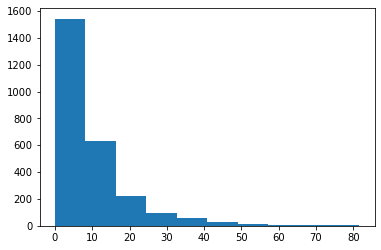

In [202]:
plt.hist(df['LOS_days']);

In [203]:
df['LOS_days'].describe()

count    2616.000000
mean        9.982310
std        10.782865
min         0.000000
25%         3.206250
50%         6.655208
75%        12.596528
max        81.586806
Name: LOS_days, dtype: float64

In [204]:
# Calculate Tertiles

q1 = df['LOS_days'].quantile(q=(1/3))
q2 = df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

4.246990740740741
9.983796296296294


In [205]:
# bin the LOS_days var

LOS = df['LOS_days']
m = max(LOS)

bins = [0, 4.26, 10.10, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [206]:
df['LOS_days'].value_counts()

1    889
0    877
2    850
Name: LOS_days, dtype: int64

## Modeling

In [207]:
# establish target feature, LOS_days, as y feature
y = df['LOS_days']
# drop target feature from features dataframe
X = df.drop(columns = ['LOS_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [208]:
cols

Index(['ICU', 'CCI', 'qSOFA', 'beta_blocker', 'Cirrhosis_score',
       'nutritional_anemia', 'SEWS', 'albumin_24_hours'],
      dtype='object')

## Standardize Data

In [209]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [210]:
X.head()

ICU  CCI  qSOFA  beta_blocker  Cirrhosis_score  nutritional_anemia  SEWS  \
0    1    6      1             0                0                   0     1   
1    0    6      1             1                0                   0     0   
2    1    2      1             0                0                   0     1   
3    0   12      0             0                1                   0     0   
4    1    3      0             0                0                   0     0   

   albumin_24_hours  
0                 0  
1                 0  
2                 0  
3                 1  
4                 1

In [211]:
X.shape

(2616, 8)

## Train Test Split

In [212]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [213]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [214]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [215]:
y_train.value_counts()

1    709
0    693
2    690
Name: LOS_days, dtype: int64

## Multinomial Logistic Regression

In [173]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: ICU Score: -0.29982
Feature: CCI Score: 0.00102
Feature: albumin_lab_baseline_severity Score: -0.20819
Feature: qSOFA Score: -0.17371
Feature: beta_blocker Score: -0.28440
Feature: Cirrhosis_score Score: 0.15729
Feature: nutritional_anemia Score: 0.16103
Feature: SEWS Score: 0.01079
Feature: albumin_24_hours Score: -0.18539


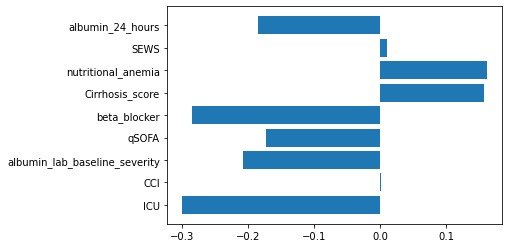

In [174]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [175]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

                               Importance
nutritional_anemia               1.174724
Cirrhosis_score                  1.170334
SEWS                             1.010853
CCI                              1.001024
qSOFA                            0.840542
albumin_24_hours                 0.830777
albumin_lab_baseline_severity    0.812052
beta_blocker                     0.752465
ICU                              0.740953


In [176]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [177]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[345 148 206]
 [249 201 245]
 [228 156 314]]


In [178]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.42      0.49      0.45       699
           1       0.40      0.29      0.34       695
           2       0.41      0.45      0.43       698

    accuracy                           0.41      2092
   macro avg       0.41      0.41      0.41      2092
weighted avg       0.41      0.41      0.41      2092



In [179]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[85 51 38]
 [55 50 71]
 [51 39 84]]


In [180]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.45      0.49      0.47       174
           1       0.36      0.28      0.32       176
           2       0.44      0.48      0.46       174

    accuracy                           0.42       524
   macro avg       0.41      0.42      0.41       524
weighted avg       0.41      0.42      0.41       524



## 1: Decision Tree (Max Depth=3)

In [216]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [217]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: ICU Score: 0.26780
Feature: CCI Score: 0.05232
Feature: qSOFA Score: 0.18272
Feature: beta_blocker Score: 0.30827
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.18888
Feature: albumin_24_hours Score: 0.00000


In [218]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [219]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[394 244  55]
 [283 339  87]
 [261 280 149]]


In [220]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.42      0.57      0.48       693
           1       0.39      0.48      0.43       709
           2       0.51      0.22      0.30       690

    accuracy                           0.42      2092
   macro avg       0.44      0.42      0.41      2092
weighted avg       0.44      0.42      0.41      2092



In [221]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[80 88 16]
 [70 89 21]
 [46 84 30]]


In [222]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.41      0.43      0.42       184
           1       0.34      0.49      0.40       180
           2       0.45      0.19      0.26       160

    accuracy                           0.38       524
   macro avg       0.40      0.37      0.36       524
weighted avg       0.40      0.38      0.37       524



In [223]:
feature_names = X_train.columns.tolist()
class_names = ['Low', 'Medium', 'High']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [36]:
pwd

'/Users/ianweimer/Desktop/JupyterNotebooks/1083-albumin-data-exploration/ML/Blood_Diseases_Cohort'

In [42]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D3.png')

True

## 2: Decision Tree (Max Depth=4)

In [224]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: ICU Score: 0.18442
Feature: CCI Score: 0.21920
Feature: qSOFA Score: 0.19157
Feature: beta_blocker Score: 0.21229
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.19252
Feature: albumin_24_hours Score: 0.00000


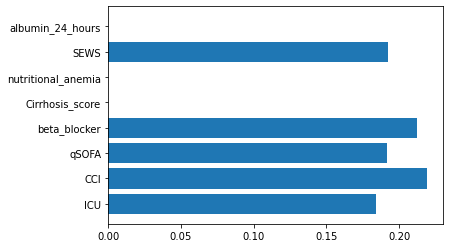

In [225]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [226]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [227]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[397 148 148]
 [283 211 215]
 [261 123 306]]


In [228]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.42      0.57      0.49       693
           1       0.44      0.30      0.35       709
           2       0.46      0.44      0.45       690

    accuracy                           0.44      2092
   macro avg       0.44      0.44      0.43      2092
weighted avg       0.44      0.44      0.43      2092



In [229]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[80 57 47]
 [70 50 60]
 [46 51 63]]


In [230]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.41      0.43      0.42       184
           1       0.32      0.28      0.30       180
           2       0.37      0.39      0.38       160

    accuracy                           0.37       524
   macro avg       0.37      0.37      0.37       524
weighted avg       0.37      0.37      0.37       524



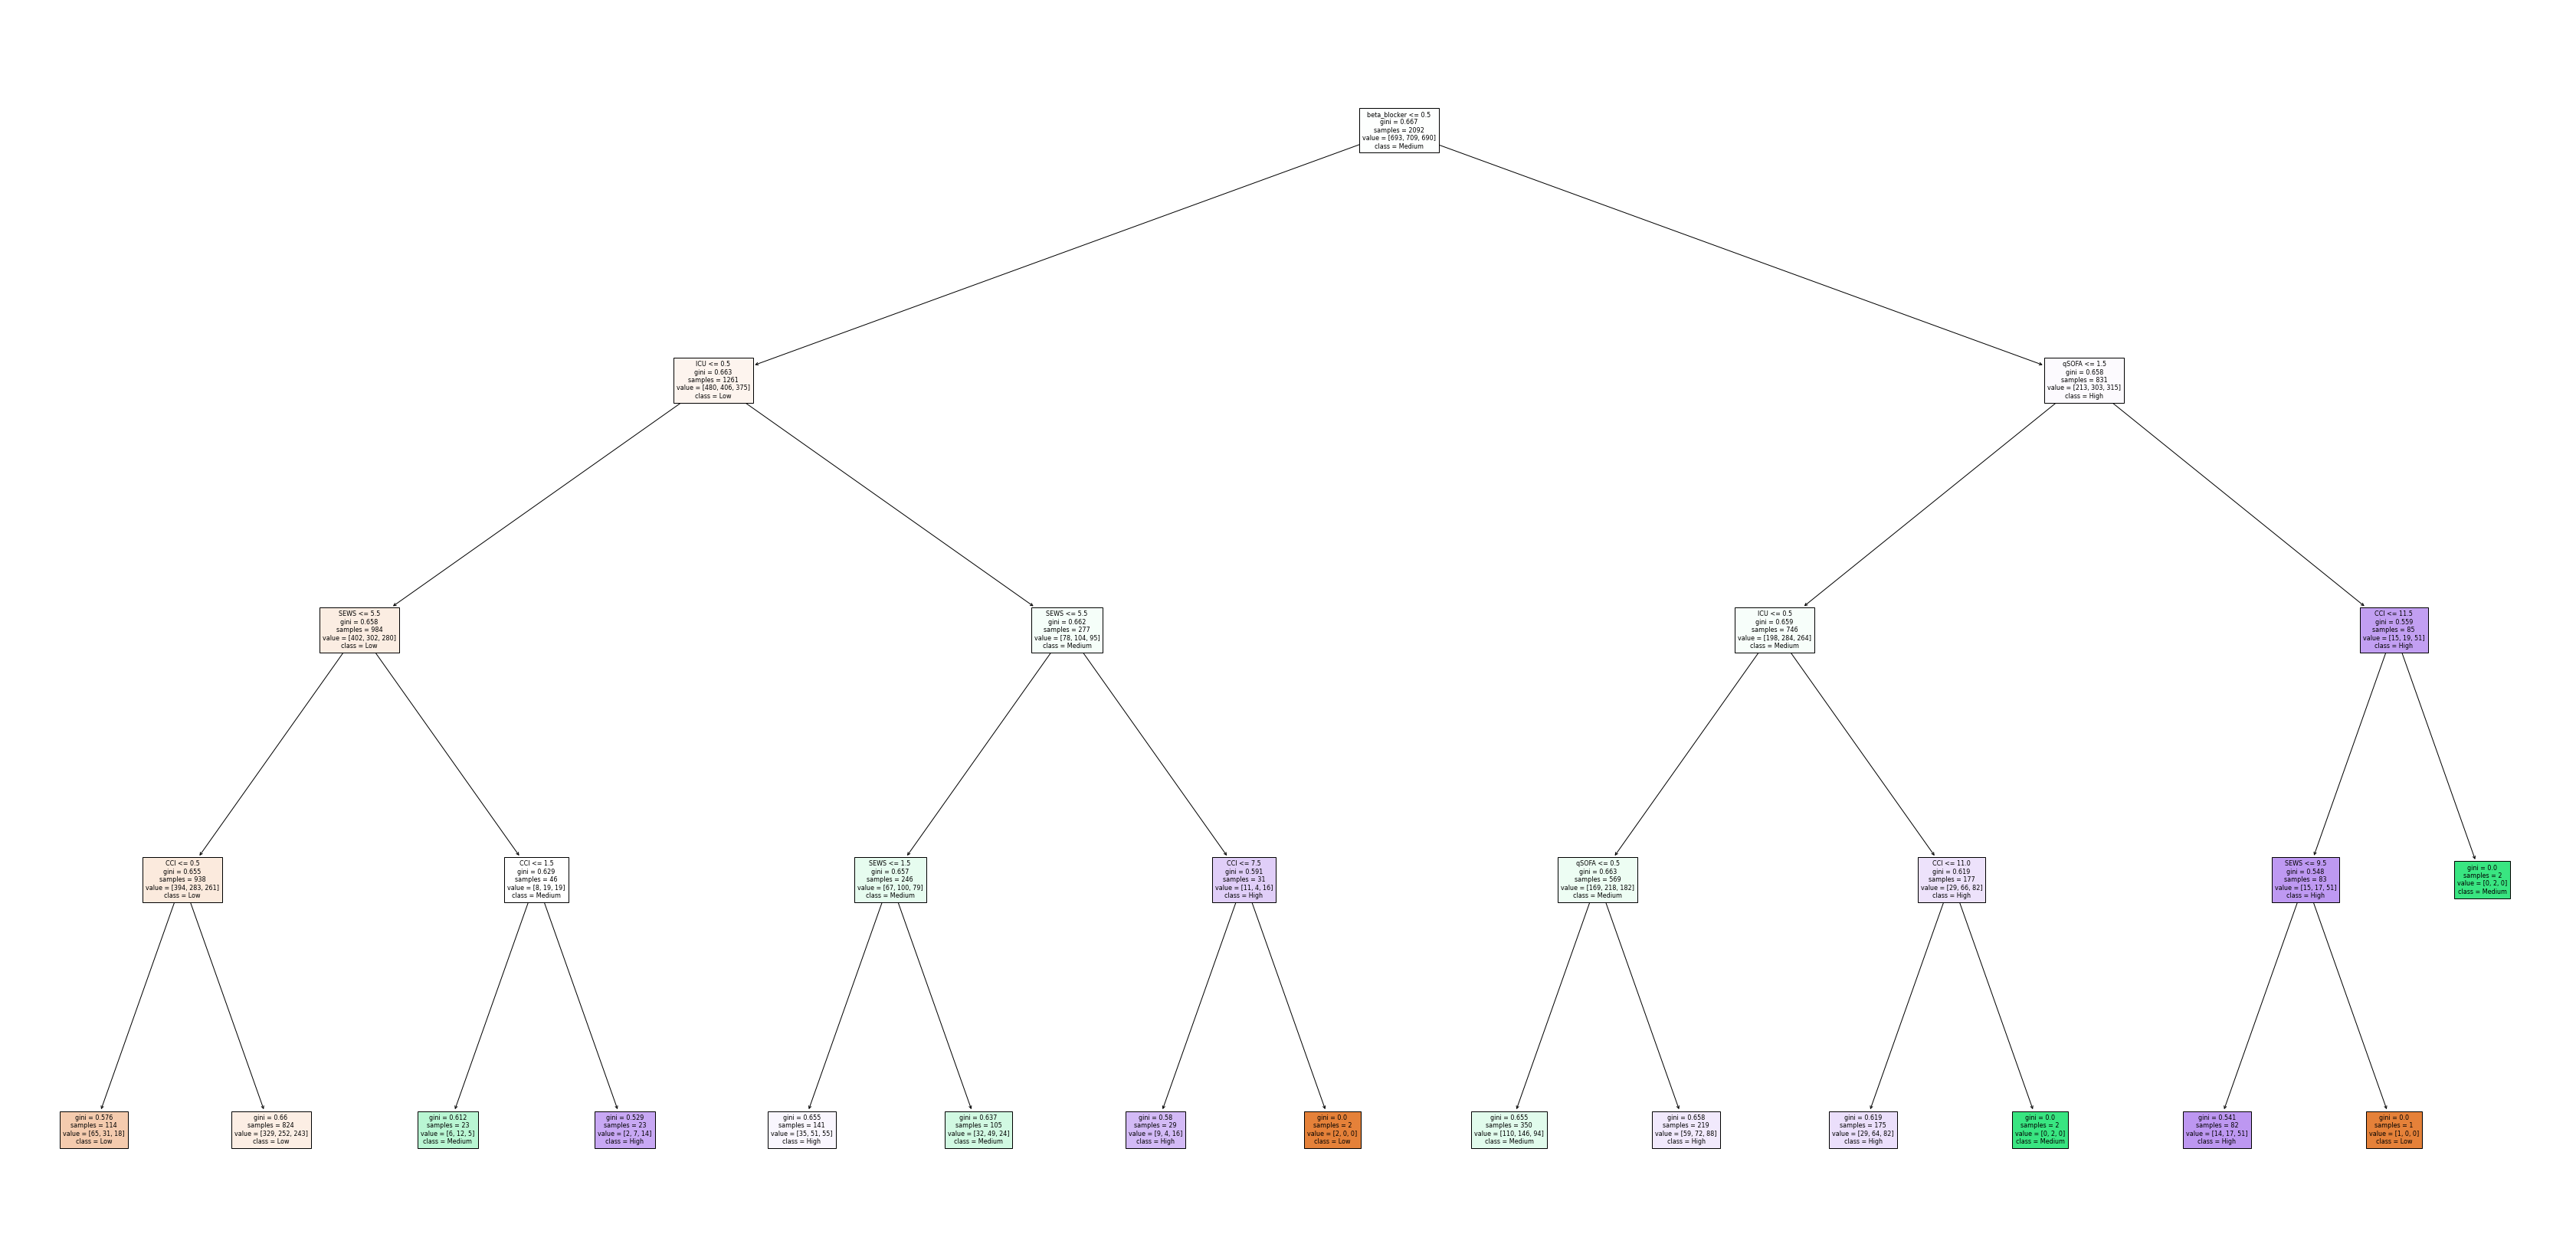

In [231]:
feature_names = X_train.columns.tolist()
class_names = ['Low', 'Medium', 'High']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [52]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D4.png')

True

## 3: Decision Tree 

In [232]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

Feature: ICU Score: 0.24590
Feature: CCI Score: 0.15488
Feature: qSOFA Score: 0.20346
Feature: beta_blocker Score: 0.27625
Feature: Cirrhosis_score Score: 0.04904
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.07046
Feature: albumin_24_hours Score: 0.00000


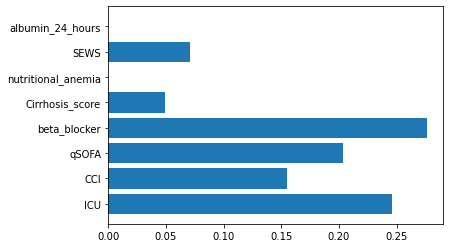

In [233]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [234]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [235]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[354 153 186]
 [256 199 254]
 [218 134 338]]


In [236]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.43      0.51      0.47       693
           1       0.41      0.28      0.33       709
           2       0.43      0.49      0.46       690

    accuracy                           0.43      2092
   macro avg       0.42      0.43      0.42      2092
weighted avg       0.42      0.43      0.42      2092



In [237]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[72 58 54]
 [69 48 63]
 [43 55 62]]


In [238]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39       184
           1       0.30      0.27      0.28       180
           2       0.35      0.39      0.37       160

    accuracy                           0.35       524
   macro avg       0.35      0.35      0.35       524
weighted avg       0.35      0.35      0.35       524



In [240]:
feature_names = X_train.columns.tolist()
class_names = ['Low', 'Medium', 'High']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [135]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D5_NCBL.png')

True

## 4: Decision Tree 

In [241]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

In [242]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

Feature: ICU Score: 0.23146
Feature: CCI Score: 0.14579
Feature: qSOFA Score: 0.25022
Feature: beta_blocker Score: 0.26004
Feature: Cirrhosis_score Score: 0.04616
Feature: nutritional_anemia Score: 0.00000
Feature: SEWS Score: 0.06633
Feature: albumin_24_hours Score: 0.00000


In [138]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [139]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[30770 13953]
 [13494 31229]]


In [140]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69     44723
           1       0.69      0.70      0.69     44723

    accuracy                           0.69     89446
   macro avg       0.69      0.69      0.69     89446
weighted avg       0.69      0.69      0.69     89446



In [141]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7644 3505]
 [ 357  716]]


In [142]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     11149
           1       0.17      0.67      0.27      1073

    accuracy                           0.68     12222
   macro avg       0.56      0.68      0.53     12222
weighted avg       0.89      0.68      0.75     12222



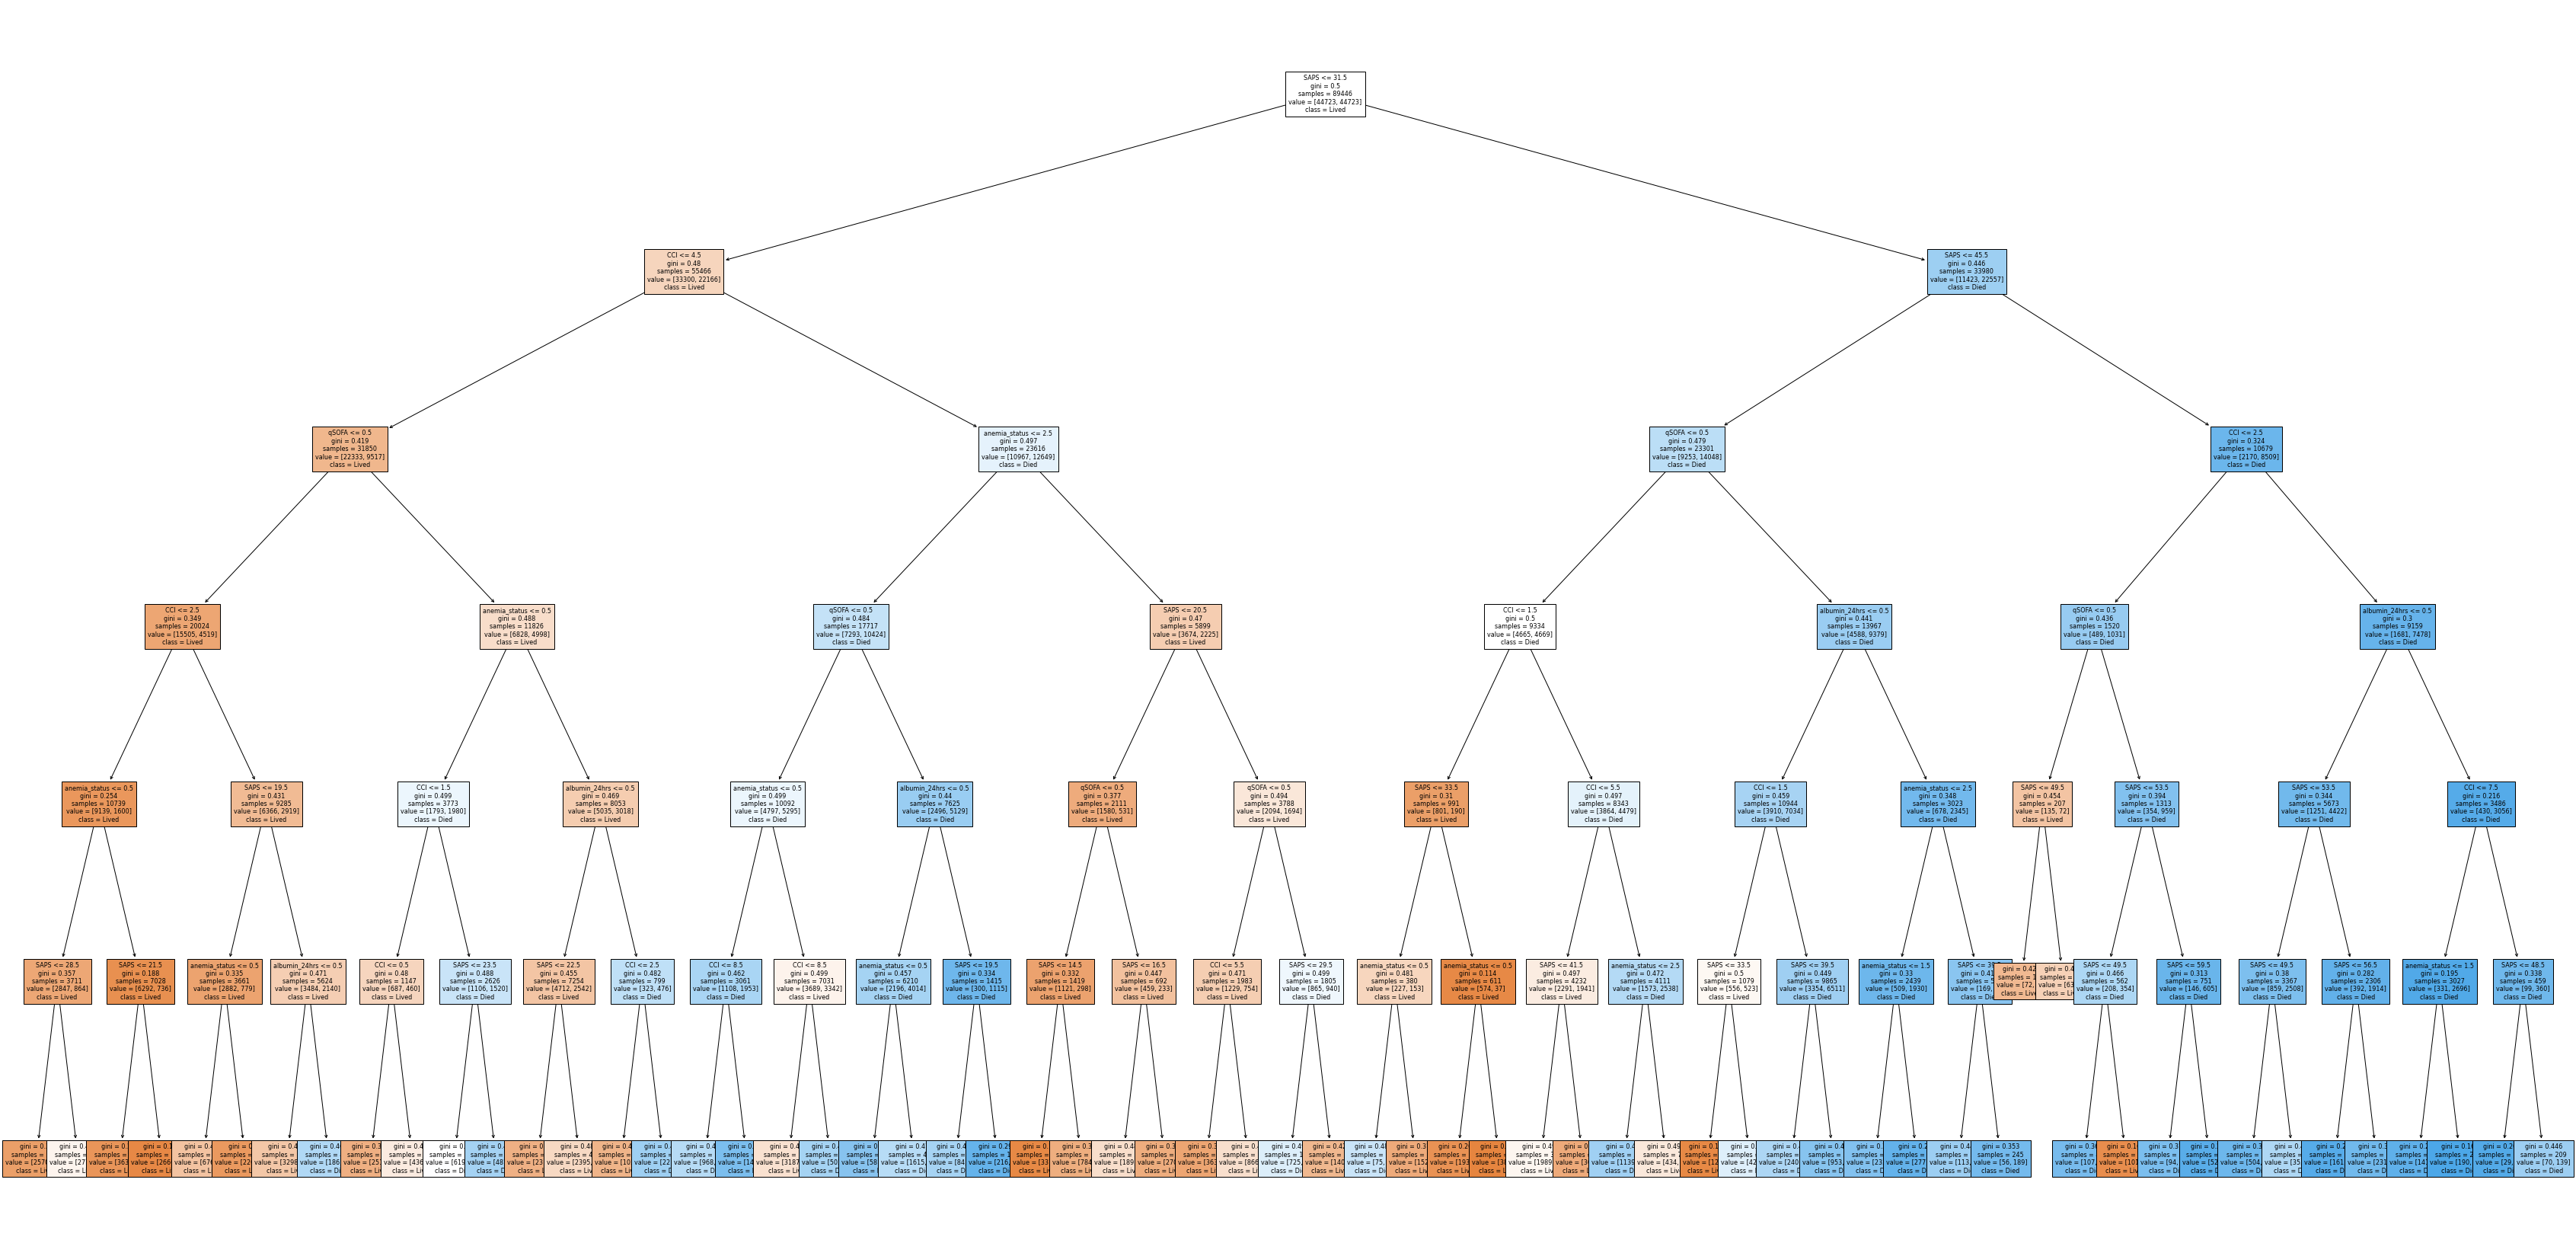

In [143]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [144]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D6_NCBL.png')

True

## 5: Decision Tree 

In [145]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: anemia_status Score: 0.09236
Feature: CCI Score: 0.25386
Feature: albumin_24hrs Score: 0.03351
Feature: qSOFA Score: 0.11989
Feature: SAPS Score: 0.50037


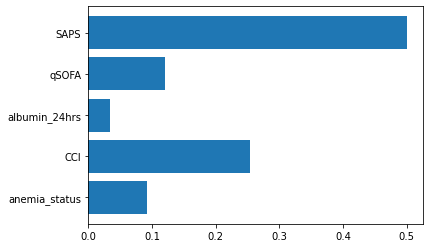

In [146]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [147]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [148]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[32063 12660]
 [13854 30869]]


In [149]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     44723
           1       0.71      0.69      0.70     44723

    accuracy                           0.70     89446
   macro avg       0.70      0.70      0.70     89446
weighted avg       0.70      0.70      0.70     89446



In [150]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[7999 3150]
 [ 420  653]]


In [151]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     11149
           1       0.17      0.61      0.27      1073

    accuracy                           0.71     12222
   macro avg       0.56      0.66      0.54     12222
weighted avg       0.88      0.71      0.77     12222



In [152]:
feature_names = X_train.columns.tolist()
class_names = ['Lived', 'Died']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [153]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('30DM_DT_D7_NCBL.png')

True

## Random Forest

In [53]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [54]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [55]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 42478   6691  29106]
 [ 27499   9425  54026]
 [ 19704   6073 109965]]


In [56]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.47      0.54      0.51     78275
           1       0.42      0.10      0.17     90950
           2       0.57      0.81      0.67    135742

    accuracy                           0.53    304967
   macro avg       0.49      0.49      0.45    304967
weighted avg       0.50      0.53      0.48    304967



In [57]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[10737  1690  7277]
 [ 6864  2400 13411]
 [ 4863  1550 27450]]


In [58]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51     19704
           1       0.43      0.11      0.17     22675
           2       0.57      0.81      0.67     33863

    accuracy                           0.53     76242
   macro avg       0.49      0.49      0.45     76242
weighted avg       0.50      0.53      0.48     76242



Feature: albumin_24hrs Score: 0.68268
Feature: ICU Score: 0.09195
Feature: CCI Score: 0.04476
Feature: qSOFA Score: 0.05184
Feature: beta_blocker Score: 0.05392
Feature: Cirrhosis_score Score: 0.02860
Feature: nutritional_anemia Score: 0.00242
Feature: SEWS Score: 0.04383


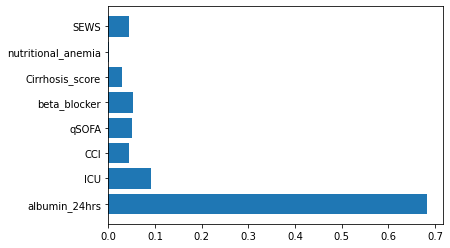

In [59]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()